# Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score


## Importing the datasets

In [41]:
dataset2013= pd.read_csv('wheat-2013-supervised.csv')
dataset2014 = pd.read_csv('wheat-2014-supervised.csv')

#merging the datas to create a single dataset
dataset = pd.concat([dataset2013, dataset2014],axis=0)

## Understanding the Dataset

In [42]:
print(dataset2013.shape)
print(dataset2014.shape)
print(dataset.shape)


(177493, 26)
(182549, 26)
(360042, 26)


In [13]:
#dataset2013.head()
#dataset2014.head()
dataset.head()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.70,20.85,0.00,29.53,0.91,...,0,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.10,26.92,0.00,29.77,0.93,...,0,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7
2,Adams,Washington,47.006888,-118.510160,11/30/2013 0:00,33.38,26.95,0.00,29.36,0.94,...,0,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7
3,Adams,Washington,47.162342,-118.699677,11/30/2013 0:00,28.05,25.93,0.91,29.47,0.94,...,0,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7
4,Adams,Washington,47.157512,-118.434056,11/30/2013 0:00,28.83,25.98,0.91,29.86,0.94,...,0,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7


In [14]:
dataset.describe()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
count,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000,177492.000000,177492.000000,177492.000000,...,177493.0,177239.000000,177493.000000,177493.000000,177463.000000,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000
mean,37.525355,-100.877849,54.836240,27.915526,0.071478,29.712311,0.593973,0.001158,0.010633,0.133540,...,0.0,1017.077664,57.547801,34.393113,9.285829,191.165483,8.436830,146.346701,92.633084,31.443024
std,4.918148,5.960510,23.827278,22.029381,0.138932,16.687710,0.163590,0.004559,0.044782,0.253416,...,0.0,8.607401,20.755273,17.801718,1.281721,104.103600,4.767758,10.130267,53.608768,15.214107
min,27.803015,-120.914093,-39.970000,-58.420000,0.000000,-36.090000,0.080000,0.000000,0.000000,0.000000,...,0.0,942.490000,-22.000000,-39.790000,0.600000,0.000000,0.040000,117.000000,0.000000,9.000000
25%,34.135464,-101.294945,37.830000,14.310000,0.000000,19.600000,0.470000,0.000000,0.000000,0.000000,...,0.0,1011.240000,43.350000,23.420000,9.180000,127.000000,4.760000,137.876236,46.000000,17.300000
50%,36.810364,-99.128028,58.880000,26.560000,0.010000,27.850000,0.600000,0.000000,0.000000,0.000000,...,0.0,1016.690000,58.880000,33.250000,9.890000,192.000000,7.670000,147.225510,93.000000,31.100000
75%,38.945878,-97.352044,73.100000,42.200000,0.090000,38.890000,0.720000,0.000200,0.002800,0.090000,...,0.0,1022.920000,73.100000,46.070000,10.000000,275.000000,11.530000,152.935913,139.000000,43.100000
max,48.981928,-94.613571,177.320000,77.180000,1.000000,75.180000,1.000000,0.152900,2.054900,0.960000,...,0.0,1048.130000,105.200000,77.180000,10.000000,359.000000,31.730000,206.000000,185.000000,72.200000


In [15]:
# Removing Columns which will not contribute to predicting Yield
total_data1 = dataset.drop(['CountyName','State','Latitude','Longitude','Date'],axis=1)

In [16]:
# Deleting the rows which have empty features
total_data2 = total_data1.dropna(axis = 0)

In [17]:
# Yield data
print(total_data2['Yield'])

0         35.7
1         35.7
2         35.7
3         35.7
4         35.7
5         35.7
6         14.4
7         14.4
8         14.4
9         14.4
10        14.4
11        14.4
12        46.5
13        46.5
14        46.5
15        46.5
16        46.5
17        46.5
18        45.6
19        45.6
20        45.6
21        45.6
22        45.6
23        45.6
24        13.1
25        13.1
26        13.1
27        13.1
28        13.1
29        13.1
          ... 
177463    36.9
177464    11.2
177465    11.2
177466    11.2
177467    11.2
177468    11.2
177469    47.9
177470    47.9
177471    47.9
177472    47.9
177473    47.9
177474    47.9
177475    30.4
177476    30.4
177477    30.4
177478    30.4
177479    30.4
177480    30.4
177481    31.9
177482    31.9
177483    31.9
177484    31.9
177485    31.9
177486    31.9
177487    59.0
177488    59.0
177489    59.0
177490    59.0
177491    59.0
177492    59.0
Name: Yield, Length: 177229, dtype: float64


In [18]:
# Importing the library for splitting the data into Training and Testring sets
from sklearn.model_selection import train_test_split

In [19]:
# Splitting data to Train set and Test set
y = total_data2['Yield']
X = total_data2.drop(['Yield'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Scaling the values
'''
from sklearn import preprocessing
columns_to_scale = total_data2.columns.tolist()
columns_to_scale = [x for x in columns_to_scale if x != 'Yield']
print(columns_to_scale)

std_scaler = preprocessing.StandardScaler().fit(X_train[columns_to_scale])
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train[columns_to_scale])

X_train[columns_to_scale] = std_scaler.transform(X_train[columns_to_scale])

X_test[columns_to_scale] = std_scaler.transform(X_test[columns_to_scale])

'''

"\nfrom sklearn import preprocessing\ncolumns_to_scale = total_data2.columns.tolist()\ncolumns_to_scale = [x for x in columns_to_scale if x != 'Yield']\nprint(columns_to_scale)\n\nstd_scaler = preprocessing.StandardScaler().fit(X_train[columns_to_scale])\nminmax_scaler = preprocessing.MinMaxScaler().fit(X_train[columns_to_scale])\n\nX_train[columns_to_scale] = std_scaler.transform(X_train[columns_to_scale])\n\nX_test[columns_to_scale] = std_scaler.transform(X_test[columns_to_scale])\n\n"

In [21]:
# Converting the features to float data type
X.astype(float),y.astype(float)

(        apparentTemperatureMax  apparentTemperatureMin  cloudCover  dewPoint  \
 0                        35.70                   20.85        0.00     29.53   
 1                        35.10                   26.92        0.00     29.77   
 2                        33.38                   26.95        0.00     29.36   
 3                        28.05                   25.93        0.91     29.47   
 4                        28.83                   25.98        0.91     29.86   
 5                        30.32                   22.40        0.00     28.91   
 6                        61.87                   24.98        0.00     33.35   
 7                        61.94                   24.74        0.00     33.20   
 8                        61.19                   26.95        0.00     35.18   
 9                        61.35                   26.87        0.00     35.15   
 10                       61.17                   27.18        0.00     35.47   
 11                       60

### Preprocessing End

# Polynomial Regression

In [22]:

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression(normalize=True)
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
y_predPR = lin_reg_2.predict(X_poly)

In [25]:
#print(lin_reg_2.score(X_train,y_train))
print(lin_reg_2.score(X_poly,y))
print(r2_score(y,y_predPR))

0.3724026576931827
0.3724026576931827


#### Polynomial Regression end

In [26]:
#  Visualisation




# Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtregressor = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=42)
dtregressor.fit(X_train, y_train)

y_predDT = dtregressor.predict(X_test)

In [29]:
print(y_predDT)

[12.7 49.3 51.2 ...  9.6 27.7 45.6]


In [30]:
print(dtregressor.score(X_test,y_test))
print(r2_score(y_test,y_predDT))

0.6745525231373469
0.6745525231373469


In [31]:
#Visualisation





### Decision Tree end

# Random Forest Regression

In [32]:
# Importing the Library
from sklearn.ensemble import RandomForestRegressor

In [33]:
# instantiating the model
rfregressor = RandomForestRegressor(n_estimators=100, random_state = 42)
model=rfregressor.fit(X_train, y_train)

In [34]:
# Predicting Test Set
y_pred = model.predict(X_test)

In [35]:
# Print predocted values
print(y_pred)

[16.163 38.29  46.064 ... 12.866 28.459 28.999]


In [36]:
# Storing values of predicted Yield in a new column
total_data2['y_pred']=np.NAN
total_data2.iloc[(len(total_data2)-len(y_pred)):,-1:] = y_pred
total_data3 = total_data2.dropna
print(y_pred)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[16.163 38.29  46.064 ... 12.866 28.459 28.999]


D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
# Checking the Accuracy
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9797195268370239
0.8548544624665072


In [38]:
# important features
imp = list(zip(X,model.feature_importances_))
imp=sorted(imp,key=lambda x:x[1])

In [39]:
# Printing the feature importance
print(imp)

[('precipTypeIsOther', 0.0), ('precipTypeIsSnow', 0.0003020010512853739), ('precipTypeIsRain', 0.001183343697379852), ('precipAccumulation', 0.003853853210302644), ('precipProbability', 0.0068206020273084015), ('precipIntensityMax', 0.012184726118114865), ('precipIntensity', 0.014831802483320708), ('cloudCover', 0.03287244582035734), ('apparentTemperatureMax', 0.04539134270719786), ('temperatureMin', 0.04742161367504414), ('visibility', 0.048403077341477474), ('temperatureMax', 0.06468851166097943), ('apparentTemperatureMin', 0.06719397021696268), ('dewPoint', 0.07028924073801203), ('humidity', 0.07963215466904505), ('windSpeed', 0.08724171371860778), ('NDVI', 0.09549803488641294), ('DayInSeason', 0.1008345565765131), ('windBearing', 0.10975762036661407), ('pressure', 0.11159938903506425)]


In [40]:
#Visualisation






### random forests end

# That's all Folks!

# EXTRAS

### Don't run further, it won't work.

# SVR

In [34]:
# X
# Support vector regression (RBF)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.05, test_size=0.95, random_state=42)

from sklearn.svm import SVR
svregressor=SVR(kernel='linear', epsilon=1.0)

svregressor.fit(X_train2,y_train2)
pred=svregressor.predict(X_test2)


/Users/ruchita/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
print(svregressor.score(X_test2,y_test2))
print(svregressor.score(X_train2,y_train2))

print(r2_score(y_test2,pred))

0.032266696131612704
0.1349345231518586
0.032266696131612704


In [48]:
from sklearn import metrics

#MAE
print(metrics.mean_absolute_error(y_test, y_predDT))
#MSE
print(metrics.mean_squared_error(y_test, y_predDT))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_predDT, y_test)))

4.214100321615979
75.17892362090691
8.670578044219827


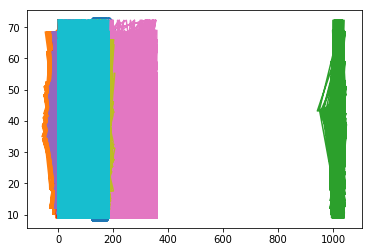

In [50]:
#visualize results
X = total_data2[["NDVI"]]
y = total_data2[["Yield"]]
plt.scatter(X, y)
plt.plot(X_train, dtregressor.predict(X_train))
plt.show()